In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
from sklearn import datasets

In [49]:
iris = datasets.load_iris()

X = iris.data

Y = iris.target

In [50]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [51]:
from sklearn.svm import SVC

In [52]:
model = SVC()

In [53]:
from sklearn.model_selection import train_test_split


In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=3)

In [55]:
model.fit(X_train,Y_train)

SVC()

In [56]:
from sklearn import metrics

In [57]:
predicted = model.predict(X_test)

expected = Y_test

In [58]:
print(metrics.accuracy_score(expected,predicted))

0.95


In [59]:
from sklearn import svm

In [60]:
X = iris.data[:,:2]
Y = iris.target

In [61]:
C = 1.0

In [62]:
svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

In [63]:
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [64]:
poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

In [65]:
lin_svc = svm.LinearSVC(C=C, dual=False, max_iter=10000).fit(X, Y)


In [66]:
h = 0.02

x_min = X[:,0].min() - 1
x_max = X[:,0].max() + 1

In [71]:
y_min = X[:,1].min() - 1
y_max = X[:,1].max() + 1


In [72]:
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [73]:
titles= ['SVC with linear kernel','LineaveSVC (linear kernel)','SVC with RBF kernel',
         'SVC with polynomial (degree 3) kernel']

/var/folders/_7/178775hs6nz5h81l3b_pbb8h0000gn/T/ipykernel_14625/2701717655.py:13: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths=0)
/var/folders/_7/178775hs6nz5h81l3b_pbb8h0000gn/T/ipykernel_14625/2701717655.py:13: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths=0)
/var/folders/_7/178775hs6nz5h81l3b_pbb8h0000gn/T/ipykernel_14625/2701717655.py:13: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths=0)
/var/folders/_7/178775hs6nz5h81l3b_pbb8h0000gn/T/ipykernel_14625/2701717655.py:13: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths=0)


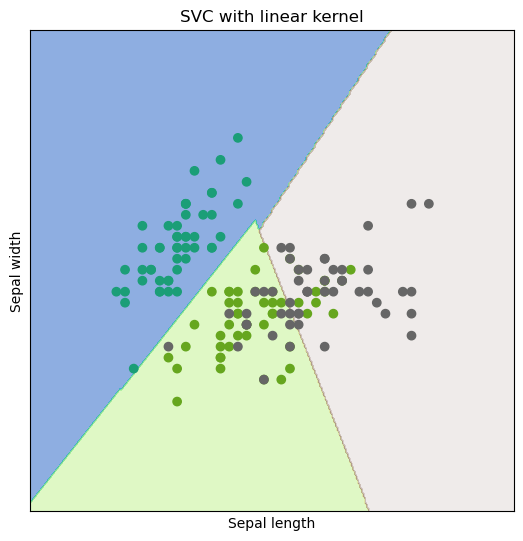

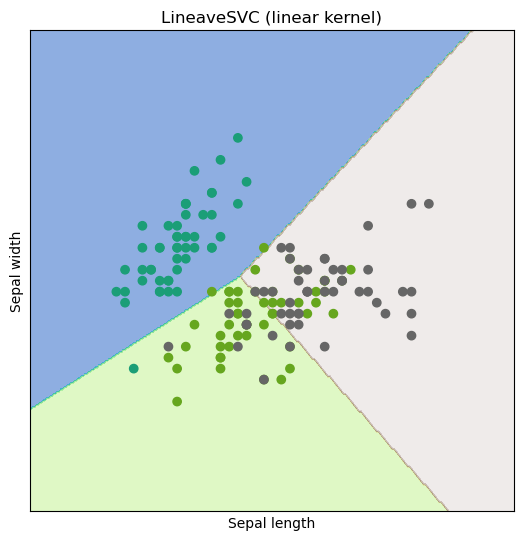

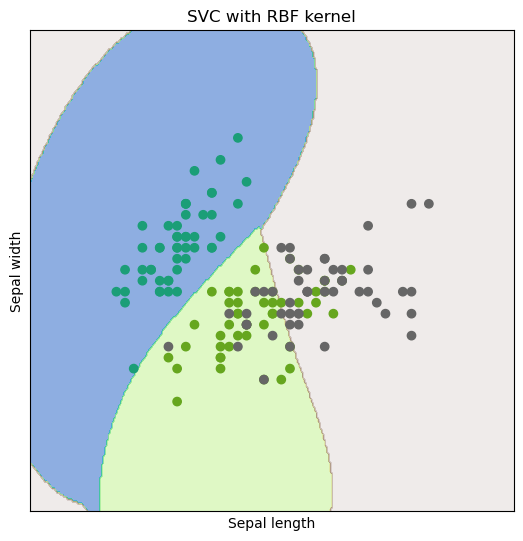

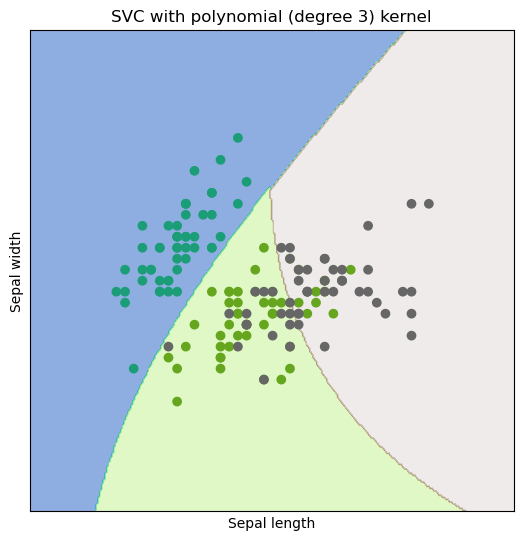

In [75]:
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    
    plt.figure(figsize=(15,15))
    
    plt.subplot(2,2,i+1)
    
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths=0)
    
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
    